# "Why do we need nonlinear activation function in a neural network ?"
> "Explaining why we need nonlinear activation fucntion and illutrating it with python code"

- toc:false
- branch: master
- badges: false
- comments: true
- author: Peiyi Hong
- categories: [learning, python, deep learning, machine learning]
- image: 'images/nn.png'

A neural network is composed of neurons. A neuron usually multiples inputs values by weights, adds a bias to the product of weights and inputs, and passes the sum into a nonlinear activation function. Just like this:
$$a = f(\sum_{j=1}^{n}{w_jx_j} + b)$$
where f is a nonlinear function such as tanh or ReLU. 

The question I intended to answer in this article is **why we need a nonlinea activation function**.

![](images/nn.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 120
plt.style.use('ggplot')

In [2]:
x = np.linspace(-20, 20, 100)
y = 3 + 4*x + x**2 + np.random.randn(100)*50

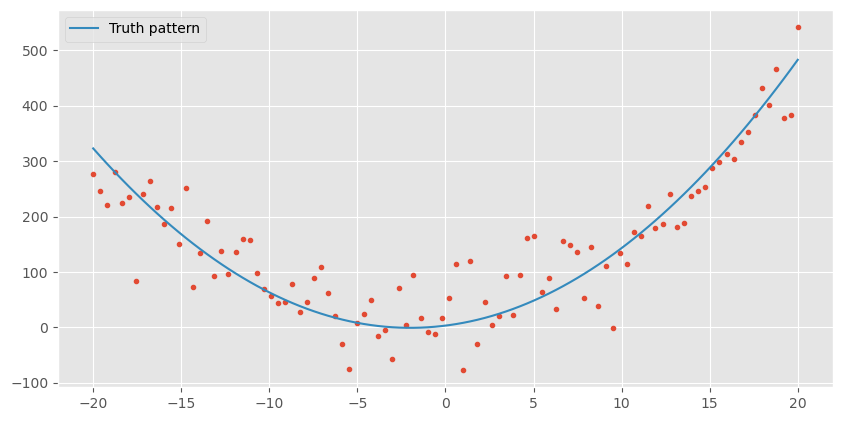

In [3]:
plt.figure(dpi=100)
plt.plot(x, y, ".")
plt.plot(x, 3 + x**2 + 4*x, "-", label="Truth pattern")
plt.legend();

In [4]:
import torch
from torch import nn

In [5]:
x = torch.tensor(x).unsqueeze(1).float()
y = torch.tensor(y).unsqueeze(1).float()

In [6]:
from torch.utils.data import DataLoader

In [7]:
ds = [(xi, yi) for xi, yi in zip(x, y)]
dl = DataLoader(ds, batch_size=20, shuffle=True)

In [8]:
model1 = nn.Sequential(
    nn.Linear(1, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 1)
)

model2 = nn.Sequential(
    nn.Linear(1, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [9]:
from torch import optim
import torch.nn.functional as F

loss_func = F.mse_loss
opt1 = optim.Adam(model1.parameters())
opt2 = optim.Adam(model2.parameters())

In [10]:
lr = 5
for epoch in range(800):
    for xb, yb in dl:
        pred = model1(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        
        opt1.step()
        opt1.zero_grad()

for epoch in range(800):
    for xb, yb in dl:
        pred = model2(xb)
        loss = loss_func(pred, yb)

        loss.backward()
        
        opt2.step()
        opt2.zero_grad()

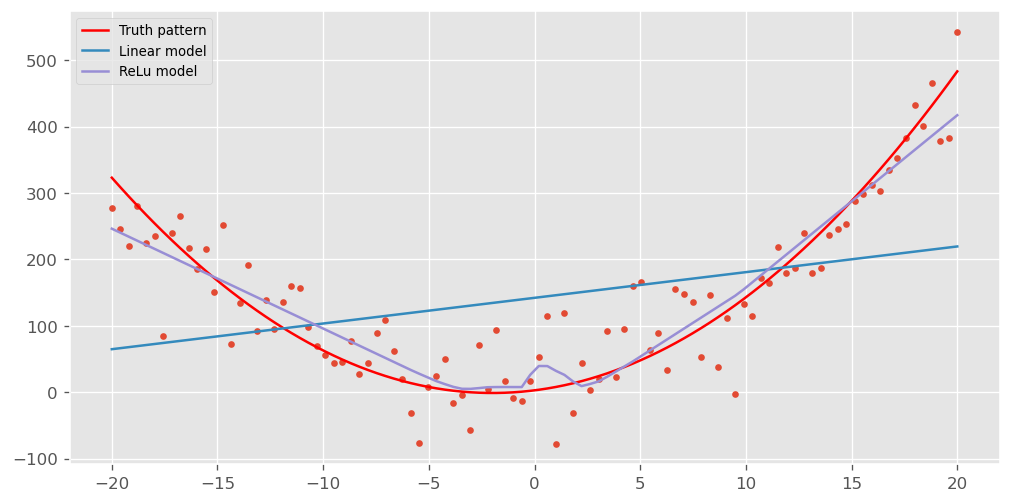

In [11]:
plt.figure(figsize=(10, 5), dpi=120)
plt.style.use('ggplot')
plt.plot(x, y, ".")
plt.plot(x, 3 + x**2 + 4*x, "r-", label="Truth pattern")
plt.plot(x, model1(x).detach().numpy(), label="Linear model")
plt.plot(x, model2(x).detach().numpy(), label="ReLu model")
plt.legend(fontsize=8);